# Creating data.tsv for mining 

Διαβάζω τα αρχεία που βρίσκονται τα data και τα αποθηκεύω στα αντίστοιχα tsv αρχεια business,entertainemnt,politics, sport,tech . Στη συνέχεια θα τα συνενώσω όλα σε ένα αρχείο data.tsv και θα τα χωρίσω σε train_set.tsv test_set.tsv. Βέβαια δε θα χρησιμοποιηθούν τα δύο τελευταία κάπου, πιο πολύ για εξάσκηση τα έκανα. Συγγνώμη που δεν τα έκανα όλα σε
ένα notebook, απλά παρέδωσα την εργασία με αρκετή πίεση χρόνου και δεν έιχα τον απαραίτητο χρόνο να τα ενώσω και να τα
τρέξω όλα ώστε να το κάνω.

In [2]:
import csv
import numpy as np
import os, glob
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import preprocessing

#to uniqueness_number einai enas ar8mos pou xrisimopoiw gia na paragw unique ids gia ta keimena twn .txt arxeiwn
def create_data(number_of_files,category,uniqueness_number):
    #ftiaxnw ena tsv arxeio gia to ka8e category kai meta 8a ta sunduasw ola mazi sto train.tsv
    with open(category + '.tsv', 'wt') as out_file: 
        tsv_writer = csv.writer(out_file, delimiter='\t') #ftiaxnw to .tsv arxeio
        for i in range(1,number_of_files+1): #diavazw ena ena ta .txt arxeia gia na ta maze4w se ena .tsv
            if i < 10:
                fln = category + '\\00' + str(i) + '.txt'
            elif (i >= 10 and i < 100):
                fln = category + '\\0' + str(i) + '.txt'
            else:
                fln = category + '\\' + str(i) + '.txt'
            path = 'C:\\Users\\user\\Desktop\\TEDedomenwn\\fulltext\\data\\' + fln  #geniko path gia ta arxeia     
            with open(path, newline='') as csvfile: #edw diavazw to ka8ena
                spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
                counter = 0 # to xrisimopoiw gia na vriskw ti 8esi tou title
                content = []
                for row in spamreader:
                    item = ' '.join(row)
                    if item != 'content':
                        if counter == 0:
                            counter = 1
                            title = item
                        else:
                            content.append(item)
            for item in content:
                if item != '':
                    tsv_writer.writerow([i+uniqueness_number, title, item, category])
                    
create_data(510,'business',0) #business folder
create_data(386,'entertainment',1000) #entertainment folder
create_data(417,'politics',2000) #politics folder
create_data(511,'sport',3000) #sport folder
create_data(401,'tech',4000) #tech folder


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
#creating data.tsv
#ftiaxnw to data.tsv gia na to xwrisw meta se test.tsv kai train.tsv
all_files = ['business.tsv','entertainment.tsv','politics.tsv', 'sport.tsv', 'tech.tsv']

#xrisimopoiw encoding unicode escape anti gia encoding utf8 giati to utf8 de mou elune to provlima me to sport.tsv
#pigi : https://stackoverflow.com/questions/2969044/python-string-escape-vs-unicode-escape
data = pd.concat(pd.read_csv(f, sep='\t' , quoting=csv.QUOTE_NONE, encoding= 'unicode_escape',
                     names=["id", "title", "content", "category"]) for f in all_files)
data.to_csv('data.tsv' ,sep='\t', quoting=csv.QUOTE_NONE ,index=False)
data['content']

0       Quarterly profits at US media giant TimeWarner...
1       The firm, which is now one of the biggest inve...
2       Time Warner said on Friday that it now owns 8%...
3       "Time Warner's fourth quarter profits were sli...
4       TimeWarner is to restate its accounts as part ...
                              ...                        
2179    I bought the US version of World of Warcraft w...
2180    Having played MMORPG games for some years I ag...
2181    Unless there is undeniable medical proof that ...
2182    "These people are pathetic. They need to get o...
2183    24hours, when i was a kid at school and i was ...
Name: content, Length: 10667, dtype: object

In [4]:
#Preparing X and y using pandas
#creating train_set and test_set
x = data[['id','title','content']]
y = data.category
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#to train_set periexei ta panta
train_set = pd.concat([x_train, y_train], axis=1, sort=False)
train_set.to_csv('train_set.tsv' ,sep='\t', quoting=csv.QUOTE_NONE ,index=False)
#to test_set periexei ta panta ektos apo to category
test_set = x_test
test_set.to_csv('test_set.tsv' ,sep='\t', quoting=csv.QUOTE_NONE ,index=False)

# 1. Creating WordClouds (Δημιουργία WordCloud)

Παρακάτω θα δημιουργήσω τα WordClouds με τη χρήση της βιβλιοθήκης Wordcloud, τα οποία εκτελούνται για τα αρχεία business, entertainemnt, politics, sport, tech

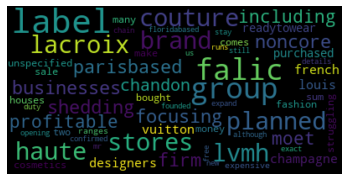

In [6]:
#wordclouds
#parakatw 8a ektelesw to wordcloud gia to arxeio business.tsv kai antistoixa 8a kanw ena cell 3exwrista
#kai gia ta upoloipa arxeia, emena gia na tre3oun mou pire 7-10 lepta to ka8ena nomizw
from string import punctuation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
my_stopwords = set(stopwords.words('english'))
other_words = {'said','say','says','just','did','was','were','year','years','like','people','tell','tells'
               'told','report','reported','get','also','however','already','may','almost','hes','ask','would',
              'could','one'}
my_stopwords = my_stopwords.union(other_words)

#ka8arizei ena text sumvola, an einai adeio to kanei null kai an einai kinezika pou de ta katalavainei to wordcloud
def clean_string(text): # ta kanei null
    text = ''.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in my_stopwords])
    if text == '' or len(text.split()) <= 2 : 
        text = 'NULL' 
    return text


business = pd.read_csv('business.tsv', sep='\t' , quoting=csv.QUOTE_NONE, encoding= 'unicode_escape',
                     names=["id", "title", "content", "category"])

cleaned = []
for item in business.content:
    cleaned.append(clean_string(str(item)))

# Create and generate a word cloud image:
for item in cleaned: 
    wordcloud = WordCloud(stopwords = my_stopwords,max_words=len(item),
                           max_font_size=40, relative_scaling=.5).generate(item)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

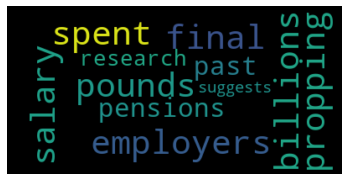

In [7]:
entertainment = pd.read_csv('entertainment.tsv', sep='\t' , quoting=csv.QUOTE_NONE, encoding= 'unicode_escape',
                     names=["id", "title", "content", "category"])

cleaned1 = []
for item in entertainment.content:
    cleaned1.append(clean_string(str(item)))

cleaned1
# Create and generate a word cloud image:
for item in cleaned[0:1000]: 
    wordcloud1 = WordCloud(stopwords = my_stopwords,max_words=len(item),
                           max_font_size=40, relative_scaling=.5).generate(item)

# Display the generated image:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

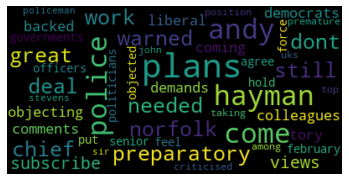

In [9]:
politics = pd.read_csv('politics.tsv', sep='\t' , quoting=csv.QUOTE_NONE, encoding= 'unicode_escape',
                     names=["id", "title", "content", "category"])

cleaned2 = []
for item in politics.content:
    cleaned2.append(clean_string(str(item)))

# Create and generate a word cloud image:
for item in cleaned2[0:1000]: 
    wordcloud2 = WordCloud(stopwords = my_stopwords,max_words=len(item),
                           max_font_size=40, relative_scaling=.5).generate(item)

# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

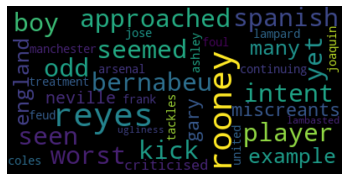

In [10]:
sport = pd.read_csv('sport.tsv', sep='\t' , quoting=csv.QUOTE_NONE, encoding= 'unicode_escape',
                     names=["id", "title", "content", "category"])

cleaned3 = []
for item in sport.content:
    cleaned3.append(clean_string(str(item)))

# Create and generate a word cloud image:
for item in cleaned3[0:1000]: 
    wordcloud3 = WordCloud(stopwords = my_stopwords,max_words=len(item),
                           max_font_size=40, relative_scaling=.5).generate(item)

# Display the generated image:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

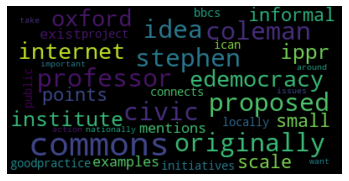

In [11]:
tech = pd.read_csv('tech.tsv', sep='\t' , quoting=csv.QUOTE_NONE, encoding= 'unicode_escape',
                     names=["id", "title", "content", "category"])

cleaned4 = []
for item in tech.content:
    cleaned4.append(clean_string(str(item)))

# Create and generate a word cloud image:
for item in cleaned4[0:1000]: 
    wordcloud4 = WordCloud(stopwords = my_stopwords,max_words=len(item),
                           max_font_size=40, relative_scaling=.5).generate(item)

# Display the generated image:
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()